<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据归一化" data-toc-modified-id="数据归一化-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据归一化</a></span></li></ul></div>

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [14]:
print(np.max(x_train),np.min(x_train))

255 0


### 数据归一化

In [15]:
#x = (x - μ) / std(方差) 符合均值是零，方差是1的正态分布
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [16]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.0231433 -0.8105136


In [17]:
#tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation="relu"))#全连接层
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#relu: y = max（0，x)
#softmax：将向量变成概率分布 x = [x1, x2, x3]
#    y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^X1 + e^x2 + e^x3
#reason for sparse: y->index. y->one)hot->[]
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd", metrics = ["accuracy"])

In [18]:
model.layers#查看有多少层

In [19]:
model.summary()#查看模型的架构

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
#第一层[none,784] *w(矩阵)+b（偏置） -> [none,300] w.shape[784,300],b=[300]

In [23]:
history = model.fit(x_train_scaled, y_train, epochs=10, 
                    validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.5424 - accuracy: 0.8112 - val_loss: 0.4351 - val_accuracy: 0.8376
Epoch 2/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.3928 - accuracy: 0.8592 - val_loss: 0.3748 - val_accuracy: 0.8696
Epoch 3/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.3539 - accuracy: 0.8729 - val_loss: 0.3580 - val_accuracy: 0.8746
Epoch 4/10
55000/55000 [==============================] - 6s 118us/sample - loss: 0.3282 - accuracy: 0.8805 - val_loss: 0.3363 - val_accuracy: 0.8762
Epoch 5/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.3085 - accuracy: 0.8885 - val_loss: 0.3328 - val_accuracy: 0.8772
Epoch 6/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.2927 - accuracy: 0.8939 - val_loss: 0.3294 - val_accuracy: 0.8778
Epoch 7/10
55000/55000 [===========================

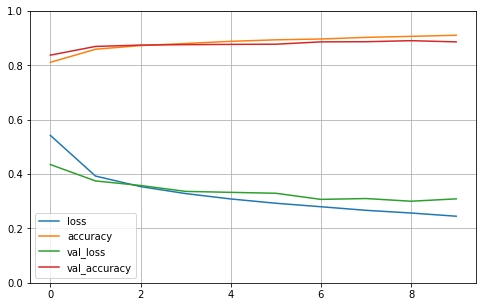

In [24]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)


In [25]:
#指标评估
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34015705008506775, 0.8808]